### Lecture Notes: Sampling, Models and Statistic

**Helpful Resource:**
- [Python Reference](http://data8.org/sp22/python-reference.html)

**Recommended Readings:**
- [Sampling](https://www.inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html)
- [Distribution of a Statistic](https://www.inferentialthinking.com/chapters/10/3/Empirical_Distribution_of_a_Statistic.html)
- [Random Sampling in Python](https://www.inferentialthinking.com/chapters/10/4/Random_Sampling_in_Python.html)

In [2]:
# import modules to be used in this notebook

from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')


In [4]:
students = Table().read_table('student_data.csv')

In [5]:
students.sample(10)

SEX,COLOR,ZIP,MATH,PAPER,CAR,SHOE,AGE,HEIGHT,PETS,SOCIAL
Female,Green,95404,2,3,1999,7,22,64,1,Yes
Female,Blue,95476,3,3,2016,10,49,69,3,Yes
Male,Blue,95407,3,5,2005,7,25,68,2,No
Female,Black,95472,3,3,nan,8,19,62,2,Yes
Male,Purple,95492,4,4,2001,7,18,67,1,No
Female,Blue,95401,5,4,2003,8,17,63,5,Yes
Female,Green,95407,1,3,nan,9,22,68,4,Yes
Female,Blue,95492,1,3,2014,8,24,65,1,No
Female,Pink,95401,3,1,2017,6,19,66,3,Yes
Female,Yellow,95492,3,4,2004,8.5,18,65,2,Yes


In [7]:
n = 2
iter = 10000
results = make_array()
for i in np.arange(iter):
    statistic = np.average(students.sample(n).column('HEIGHT'))
    results = np.append(results, statistic)

results

array([ 68.5,  66.5,  66. , ...,  65.5,  69. ,  64.5])

In [10]:
def sampling_distribution(n, col):
    iter = 10000
    results = make_array()
    for i in np.arange(iter):
        statistic = np.average(students.sample(n).column(col))
        results = np.append(results, statistic)
    return results

In [13]:
sample_5 = sampling_distribution(5, 'HEIGHT')

In [14]:
sample_10 = sampling_distribution(20, 'HEIGHT')

In [15]:
sample_50 = sampling_distribution(50, 'HEIGHT')

In [16]:
sampling_distributions = Table().with_columns('n=5', sample_5, 'n=10', sample_10, 'n=50', sample_50)

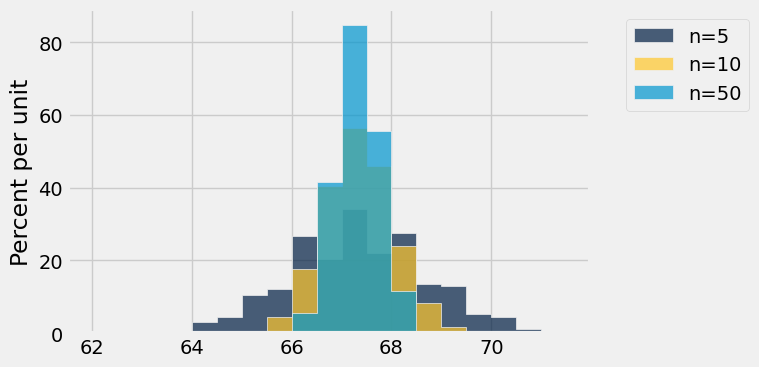

In [19]:
sampling_distributions.hist(bins = np.arange(62, 72, 0.5))

In [25]:
sample_proportions(100, make_array(0.26, 0.74))

array([ 0.21,  0.79])

In [37]:
def sampling_distribution_black(n, prop):
    results = [] 
    proportions = make_array(prop, 1-prop)   
    for i in np.arange(100000):
        results = np.append(results, sample_proportions(n, proportions).item(0)*100)
    return results

1

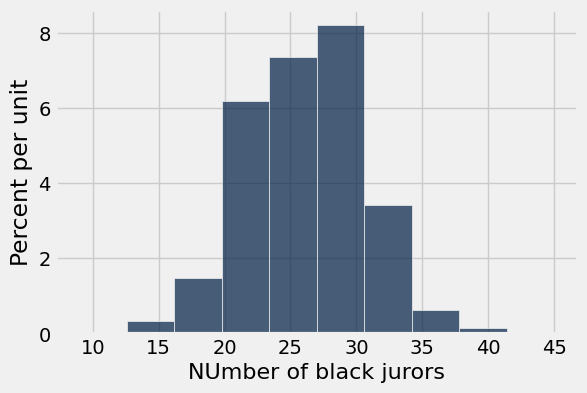

In [40]:
results = sampling_distribution_black(100, 0.26)
Table().with_column('NUmber of black jurors', results).hist()
np.count_nonzero(results < 10)